In [35]:
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

nPS = spark.read.options(header='True', inferSchema='True').csv("nuclear_plants_small_dataset.csv")
nPS.show(10)
nPS.printSchema()

+------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Status|Power_range_sensor_1|Power_range_sensor_2|Power_range_sensor_3 |Power_range_sensor_4|Pressure _sensor_1|Pressure _sensor_2|Pressure _sensor_3|Pressure _sensor_4|Vibration_sensor_1|Vibration_sensor_2|Vibration_sensor_3|Vibration_sensor_4|
+------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Normal|              4.5044|              0.7443|                 6.34|              1.9052|           29.5315|            0.8647|            2.2044|             6.048|           14.4659|            21.648|           15.3429|            1.2186|
|Normal|        

In [36]:
#Task 1 - Missing Datasets
for i in range(13):
    value = nPS.where(nPS[nPS.schema[i].name].isNull()).count() 
    print('column {0:0d} has {1:0} null values' .format(i + 1, value))

column 1 has 0 null values
column 2 has 0 null values
column 3 has 0 null values
column 4 has 0 null values
column 5 has 0 null values
column 6 has 0 null values
column 7 has 0 null values
column 8 has 0 null values
column 9 has 0 null values
column 10 has 0 null values
column 11 has 0 null values
column 12 has 0 null values
column 13 has 0 null values


In [37]:
from pyspark.sql.functions import min,max,mean,percentile_approx,variance,count
import matplotlib
import pandas as pd

#Task 2 - Summary Statistics & Box Plots

for i in range(1, 13):
    column = nPS.schema[i].name
    print(column)
    Vals = nPS.groupBy("Status")\
    .agg(min(column),\
         max(column),\
         mean(column).alias("mean({0})".format(column)),\
         percentile_approx(column, 0.5).alias("median({0})".format(column)),\
         variance(column).alias("variance_values({0})".format(column)),\
        ).show(truncate=False)    

Power_range_sensor_1
+--------+-------------------------+-------------------------+--------------------------+----------------------------+-------------------------------------+
|Status  |min(Power_range_sensor_1)|max(Power_range_sensor_1)|mean(Power_range_sensor_1)|median(Power_range_sensor_1)|variance_values(Power_range_sensor_1)|
+--------+-------------------------+-------------------------+--------------------------+----------------------------+-------------------------------------+
|Abnormal|0.0082                   |10.923078                |4.396694975903612         |4.5053                      |6.201490118793131                    |
|Normal  |0.0851                   |12.1298                  |5.602452811244976         |5.1727                      |8.374354492436746                    |
+--------+-------------------------+-------------------------+--------------------------+----------------------------+-------------------------------------+

Power_range_sensor_2
+--------+-----

+--------+-----------------------+-----------------------+------------------------+--------------------------+-----------------------------------+
|Status  |min(Vibration_sensor_2)|max(Vibration_sensor_2)|mean(Vibration_sensor_2)|median(Vibration_sensor_2)|variance_values(Vibration_sensor_2)|
+--------+-----------------------+-----------------------+------------------------+--------------------------+-----------------------------------+
|Abnormal|0.0185                 |34.331466              |10.303569907630527      |8.9085                    |58.50550622001145                  |
|Normal  |0.0277                 |34.8676                |9.699615863453822       |8.6684                    |49.060657006045574                 |
+--------+-----------------------+-----------------------+------------------------+--------------------------+-----------------------------------+

Vibration_sensor_3
+--------+-----------------------+-----------------------+------------------------+---------------

In [38]:
nPS_pd = nPS.toPandas()
nPS_pd.head()

,Status,Power_range_sensor_1,Power_range_sensor_2,Power_range_sensor_3,Power_range_sensor_4,Pressure _sensor_1,Pressure _sensor_2,Pressure _sensor_3,Pressure _sensor_4,Vibration_sensor_1,Vibration_sensor_2,Vibration_sensor_3,Vibration_sensor_4
0,Normal,4.5044,0.7443,6.3400,1.9052,29.5315,0.8647,2.2044,6.0480,14.4659,21.6480,15.3429,1.2186
1,Normal,4.4284,0.9073,5.6433,1.6232,27.5032,1.4704,1.9929,5.9856,20.8356,0.0646,14.8813,7.3483
2,Normal,4.5291,1.0199,6.1130,1.0565,26.4271,1.9247,1.9420,6.7162,5.3358,11.0779,25.0914,9.2408
3,Normal,5.1727,1.0007,7.8589,0.2765,25.1576,2.6090,2.9234,6.7485,1.9017,1.8463,28.6640,4.0157
4,Normal,5.2258,0.6125,7.9504,0.1547,24.0765,3.2113,4.4563,5.8411,0.5077,9.3700,34.8122,13.4966


<AxesSubplot:title={'center':'Vibration_sensor_4'}, xlabel='Status'>

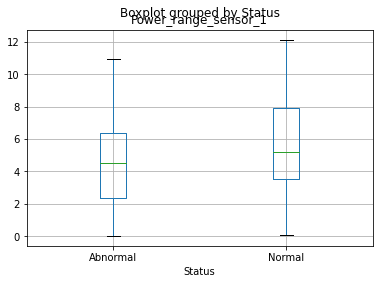

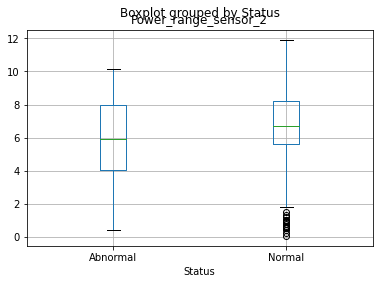

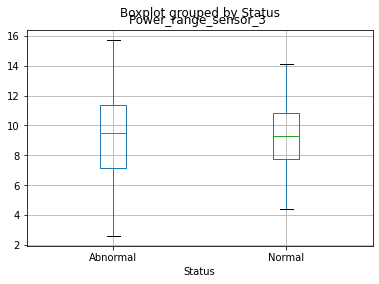

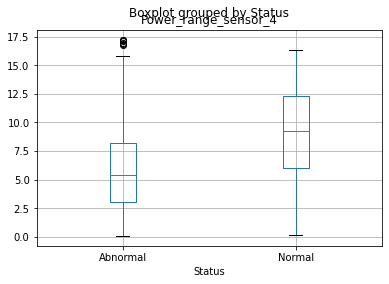

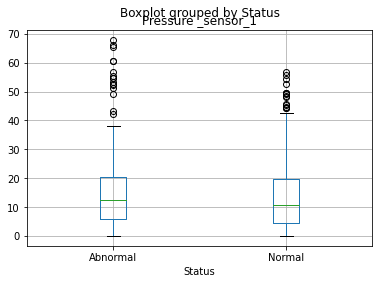

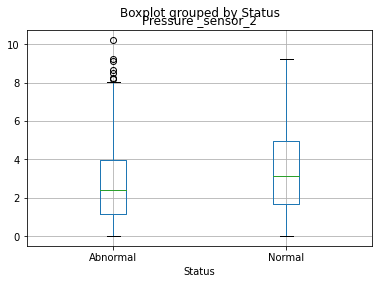

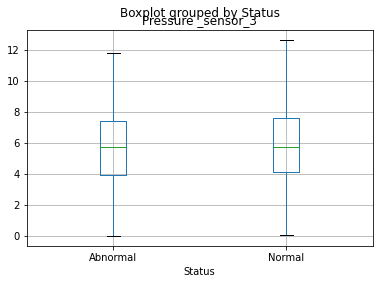

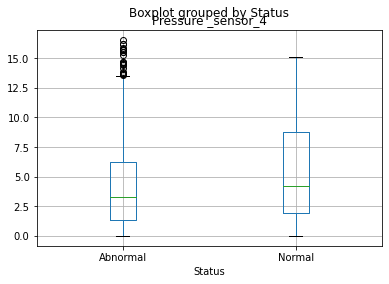

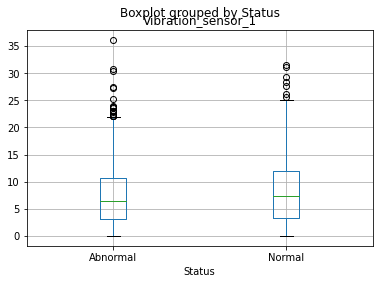

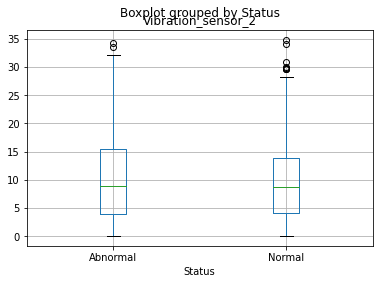

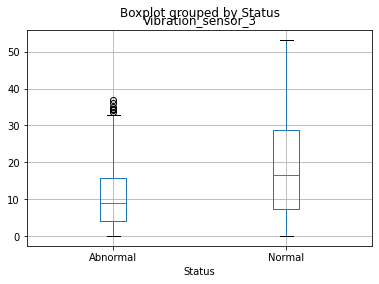

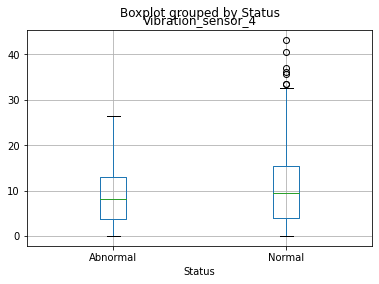

In [59]:
nPS_pd.boxplot(by='Status', column=['Power_range_sensor_1'])
nPS_pd.boxplot(by='Status', column=['Power_range_sensor_2'])
nPS_pd.boxplot(by='Status', column=['Power_range_sensor_3 '])
nPS_pd.boxplot(by='Status', column=['Power_range_sensor_4'])
nPS_pd.boxplot(by='Status', column=['Pressure _sensor_1'])
nPS_pd.boxplot(by='Status', column=['Pressure _sensor_2'])
nPS_pd.boxplot(by='Status', column=['Pressure _sensor_3'])
nPS_pd.boxplot(by='Status', column=['Pressure _sensor_4'])
nPS_pd.boxplot(by='Status', column=['Vibration_sensor_1'])
nPS_pd.boxplot(by='Status', column=['Vibration_sensor_2'])
nPS_pd.boxplot(by='Status', column=['Vibration_sensor_3'])
nPS_pd.boxplot(by='Status', column=['Vibration_sensor_4'])

In [61]:
#Task 3 - Correlation Matrix
CorrMat = nPS_pd.corr()
CorrMat

,Power_range_sensor_1,Power_range_sensor_2,Power_range_sensor_3,Power_range_sensor_4,Pressure _sensor_1,Pressure _sensor_2,Pressure _sensor_3,Pressure _sensor_4,Vibration_sensor_1,Vibration_sensor_2,Vibration_sensor_3,Vibration_sensor_4
Power_range_sensor_1,1.000000,0.095235,0.229943,0.499795,0.047805,0.652081,0.199811,0.406382,-0.152247,-0.003684,0.106583,0.014177
Power_range_sensor_2,0.095235,1.000000,0.693818,0.228438,-0.222160,0.112438,0.583086,0.136380,-0.119142,0.011013,0.243242,0.058244
Power_range_sensor_3,0.229943,0.693818,1.000000,0.083362,-0.255865,0.166549,0.362688,0.062479,-0.249057,-0.038320,0.215811,-0.023962
Power_range_sensor_4,0.499795,0.228438,0.083362,1.000000,0.150635,0.567705,-0.070547,0.823637,-0.114117,0.043383,0.330499,-0.018193
Pressure _sensor_1,0.047805,-0.222160,-0.255865,0.150635,1.000000,0.116859,-0.118713,0.131136,0.101438,-0.035196,-0.084575,-0.125128
Pressure _sensor_2,0.652081,0.112438,0.166549,0.567705,0.116859,1.000000,0.091341,0.571403,-0.099950,-0.027698,0.011015,0.001189
Pressure _sensor_3,0.199811,0.583086,0.362688,-0.070547,-0.118713,0.091341,1.000000,0.001591,0.016497,0.029766,0.019993,0.105642
Pressure _sensor_4,0.406382,0.136380,0.062479,0.823637,0.131136,0.571403,0.001591,1.000000,-0.112696,0.010560,0.191842,0.047000
Vibration_sensor_1,-0.152247,-0.119142,-0.249057,-0.114117,0.101438,-0.099950,0.016497,-0.112696,1.000000,-0.045857,-0.076277,0.026480
Vibration_sensor_2,-0.003684,0.011013,-0.038320,0.043383,-0.035196,-0.027698,0.029766,0.010560,-0.045857,1.000000,0.103704,-0.023290


In [ ]:
#Task 4 - Shuffling the data (70% training set & 30% test set)


In [6]:
!pip install matplotlib
!pip install pandas